<a href="https://colab.research.google.com/github/sonam1810/Business-Report/blob/main/BusinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-27 07:20:39--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-27 07:20:40--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  37.5MB/s    in 28s     

2023-05-27 07:21:09 (29.

In [ ]:
# importing the libraries
import sqlite3
import pandas.io.sql as pds
import pandas as pd


#connection to the Enron SQLite database
conn = sqlite3.connect("enron.db")
#create cursor object
cur = conn.cursor()
path = '/content/enron.db'

sql = "SELECT sender, rvalue as 'recipient', date, subject, body, folder FROM Message join Recipientinfo on Message.mid = RecipientInfo.mid";

df = pd.read_sql(sql, conn)
df

,sender,recipient,date,subject,body,folder
0,press.release@enron.com,all.worldwide@enron.com,2000-01-21 04:51:00,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,office.chairman@enron.com,all.downtown@enron.com,2000-01-24 01:37:00,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,office.chairman@enron.com,all.enron-worldwide@enron.com,2000-01-24 02:06:00,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,press.release@enron.com,all.worldwide@enron.com,2000-02-02 10:21:00,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,office.chairman@enron.com,all_enron_north.america@enron.com,2000-02-07 22:16:00,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...
2064437,pete.davis@enron.com,john.anderson@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"
2064438,pete.davis@enron.com,mark.guzman@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"
2064439,pete.davis@enron.com,michael.mier@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"
2064440,pete.davis@enron.com,pete.davis@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
employeelist_sql = """
PRAGMA table_info('employeelist')
"""

cur.execute(employeelist_sql)
cur

employeelist_df = pd.read_sql_query(employeelist_sql,conn)
employeelist_df

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


In [ ]:
message_sql = """
PRAGMA table_info('message')
"""

cur.execute(message_sql)
cur

message_df = pd.read_sql_query(message_sql,conn)
message_df

,cid,name,type,notnull,dflt_value,pk
0,0,mid,INTEGER,1,'0',1
1,1,sender,VARCHAR(127),1,'',0
2,2,date,DATETIME,0,None,0
3,3,message_id,VARCHAR(127),0,None,0
4,4,subject,TEXT,0,None,0
5,5,body,TEXT,0,None,0
6,6,folder,VARCHAR(127),1,'',0


In [ ]:
recipientinfo_sql = """
PRAGMA table_info('recipientinfo')
"""

cur.execute(recipientinfo_sql)
cur

recipientinfo_df = pd.read_sql_query(recipientinfo_sql,conn)
recipientinfo_df

,cid,name,type,notnull,dflt_value,pk
0,0,rid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,rtype,TEXT,0,None,0
3,3,rvalue,VARCHAR(127),0,None,0
4,4,dater,DATETIME,0,None,0


In [ ]:
referenceinfo_sql = """
PRAGMA table_info('referenceinfo')
"""

cur.execute(referenceinfo_sql)
cur

referenceinfo_df = pd.read_sql_query(referenceinfo_sql,conn)
referenceinfo_df

,cid,name,type,notnull,dflt_value,pk
0,0,rfid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,reference,TEXT,0,None,0


Task 1: Email Traffic Over Time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
SQL = """
SELECT date FROM message
"""

message_df = pd.read_sql_query(SQL,conn)
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [ ]:
#counting number of emails per day
SQL = """

SELECT strftime('%Y-%m-%d', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date
"""

cur.execute(SQL)

#put into a data Frame
messageperday_df = pd.read_sql_query(SQL,conn)
messageperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


<Axes: xlabel='date', ylabel='count'>

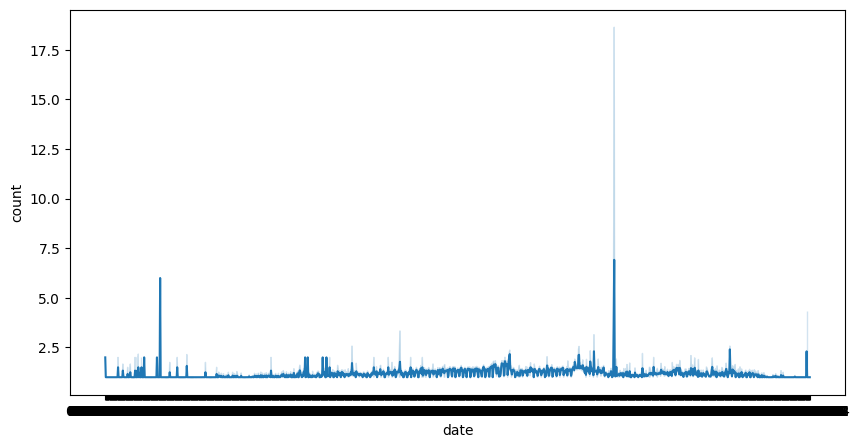

In [ ]:
#plot graph
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x= 'date' ,y= 'count' ,data=messageperday_df)

The above line plot shows the number of emails sent per day and the purpose of the line plot graph is to analyse on which date the number of emails sent has exceeded its trend

In [ ]:
#counting number of emails per week
SQL = """

SELECT strftime('%Y-%M-%w',date)
AS date, 
COUNT(*) AS count FROM message
GROUP BY DATE
"""

cur.execute(SQL)

#put into dataframe
messageperweek_df = pd.read_sql_query(SQL,conn)
messageperweek_df

,date,count
0,0001-10-3,2
1,0001-40-1,1
2,0001-11-2,1
3,0001-30-3,1
4,0001-06-1,1
...,...,...
194082,2020-53-2,1
194083,2043-34-1,1
194084,2044-46-6,1
194085,2044-59-1,1


<Axes: xlabel='date', ylabel='count'>

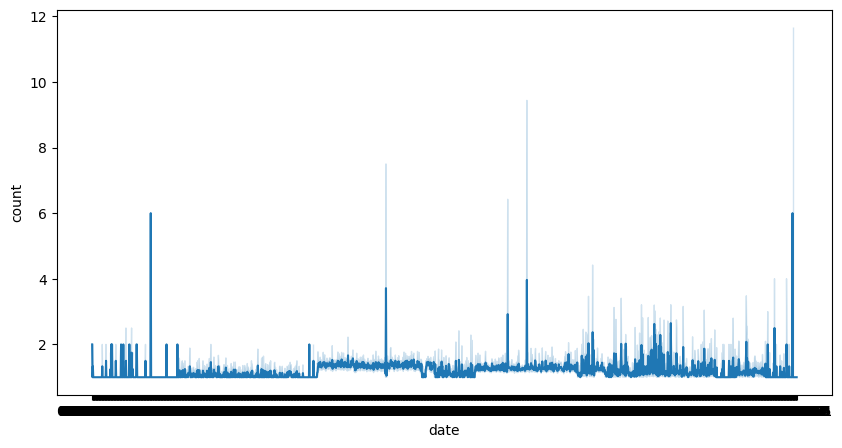

In [ ]:
#plot graph
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x= 'date' ,y= 'count' ,data=messageperweek_df)

The above line plot shows the number of emails sent each week and the purpose of the line plot graph is to analyse on which date more emails were sent.

In [ ]:
#counting emails per month
SQL = """

SELECT strftime('%Y-%m', date) AS month,
COUNT(*) AS count FROM message
GROUP BY date
"""

cur.execute(SQL)

#put into a data Frame
messagepermonth_df = pd.read_sql_query(SQL,conn)
messagepermonth_df

,month,count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


<Axes: xlabel='month', ylabel='count'>

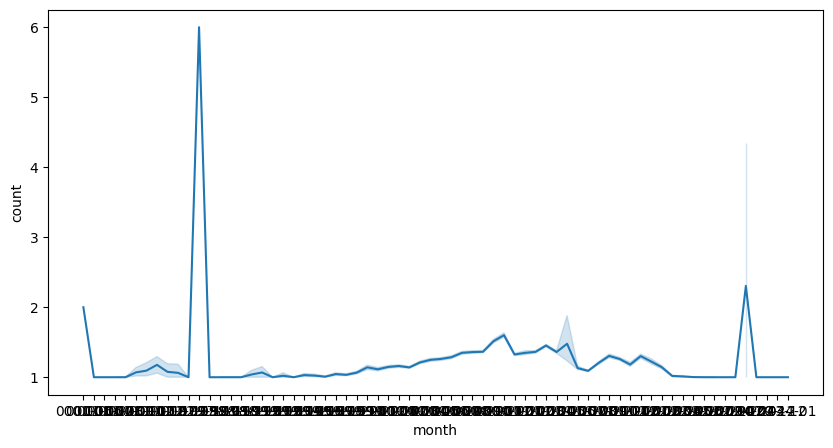

In [ ]:
#plot graph
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x= 'month' ,y= 'count' ,data=messagepermonth_df)

Task 2:Top senders and Recipients

In [ ]:
# Extract sender information from the Message table
query_senders = """
SELECT sender, COUNT(*) as count
FROM message
GROUP BY sender
ORDER BY count DESC
"""
df_senders = pd.read_sql_query(query_senders , conn)

# Display top 10 senders
print("Top 10 Email Senders:")
print(df_senders.head(10))


# Extract recipient information from the Recipientinfo table
query_recipients = """
SELECT rvalue AS recipient, COUNT(*) as count
FROM Recipientinfo
GROUP BY recipient
ORDER BY count DESC
"""
df_recipients = pd.read_sql_query(query_recipients, conn)


# Display top 10 recipients
print("Top 10 Email Recipients:")
print(df_recipients.head(10))


Top 10 Email Senders:
                          sender  count
0        jeff.dasovich@enron.com   6273
1           j.kaminski@enron.com   5838
2             kay.mann@enron.com   5100
3      sara.shackleton@enron.com   4797
4           tana.jones@enron.com   4437
5        chris.germany@enron.com   3686
6           no.address@enron.com   3511
7  enron.announcements@enron.com   2838
8      matthew.lenhart@enron.com   2784
9    debra.perlingiere@enron.com   2549
Top 10 Email Recipients:
                   recipient  count
0       no.address@enron.com  19198
1    jeff.dasovich@enron.com  11137
2  richard.shapiro@enron.com  11015
3    steven.j.kean@enron.com  10873
4  james.d.steffes@enron.com  10615
5       tana.jones@enron.com   9781
6  sara.shackleton@enron.com   9633
7    mark.e.taylor@enron.com   9090
8   louise.kitchen@enron.com   7603
9       pete.davis@enron.com   7509


<Figure size 1000x500 with 0 Axes>

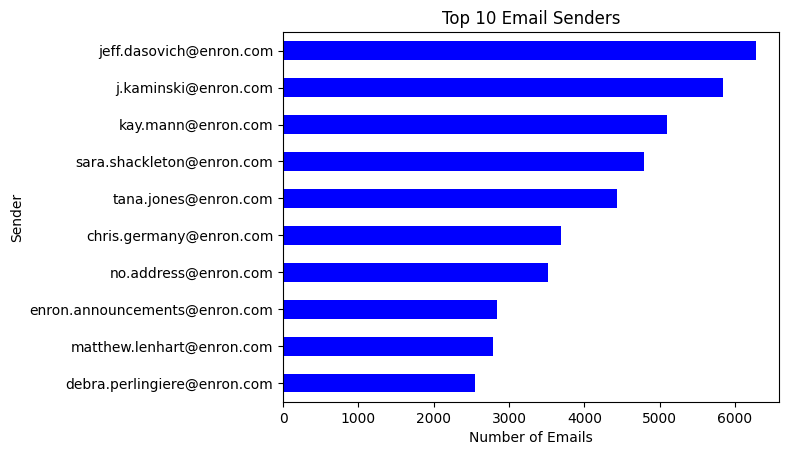

<Figure size 1000x500 with 0 Axes>

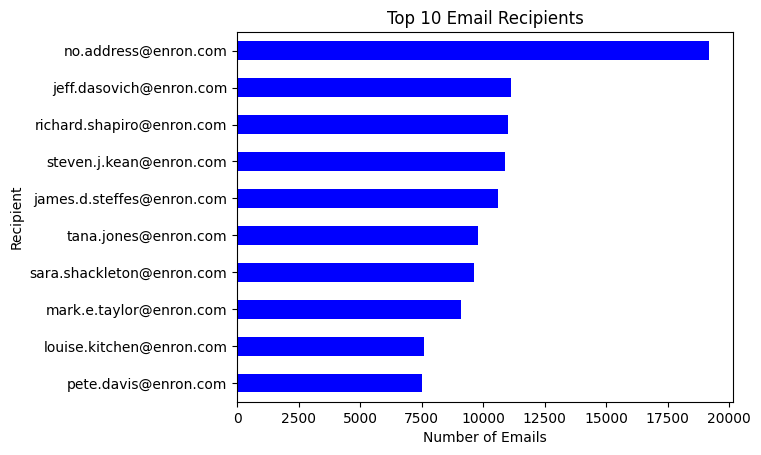

In [ ]:
# plot top 10 senders
plt.figure(figsize=(10,5))
df_senders.head(10).sort_values('count').plot(kind='barh', y='count', x='sender', legend=False, color='blue')
plt.title('Top 10 Email Senders')
plt.xlabel('Number of Emails')
plt.ylabel('Sender')
plt.show()

# plot top 10 recipients
plt.figure(figsize=(10,5))
df_recipients.head(10).sort_values('count').plot(kind='barh', y='count', x='recipient', legend=False, color='blue')
plt.title('Top 10 Email Recipients')
plt.xlabel('Number of Emails')
plt.ylabel('Recipient')
plt.show()


The first horizantal bar chart represents the top 10 email senders who sent the most emails from descending order whereas the second horizantal bar chart represents the top 10 email recipient and who received the most number of emails from descending order

In [ ]:
query = """
SELECT date(date) as date_sent, count(mid) as message_count
FROM Message
GROUP BY date_sent
ORDER BY date_sent
"""
Peak_period = pd.read_sql(query, conn)
Peak_period = pd.read_sql(query, conn)
print(Peak_period)

       date_sent  message_count
0     0001-05-30              2
1     0001-06-18              1
2     0001-07-24              1
3     0001-08-01              1
4     0001-08-06              1
...          ...            ...
1318  2020-12-24              1
1319  2020-12-29              1
1320  2043-12-28              1
1321  2044-01-02              1
1322  2044-01-04              2

[1323 rows x 2 columns]


In [ ]:
#sql query to categorize by rtype using count
sql = """
SELECT rtype, COUNT(*) as count 
FROM Recipientinfo 
GROUP BY rtype
"""

rtype_df = pd.read_sql_query(sql, conn)

print(rtype_df)

  rtype    count
0   BCC   253713
1    CC   253735
2    TO  1556994


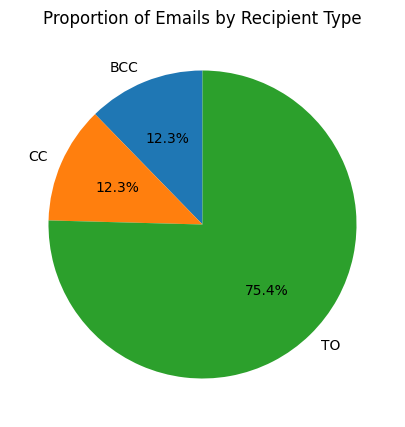

In [ ]:
rtype_proportions = rtype_df['count'] / rtype_df['count'].sum()

# Create a pie chart
plt.figure(figsize=(8, 5))
plt.pie(rtype_proportions, labels=rtype_df['rtype'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Emails by Recipient Type')
plt.show()

The above pie chart represents the proportion of emails through recipient types in percentage

### Extract/Partial Dataset

If copying the complete dataset take a long time.  During development use the following smaller extract of the data.

The following code-cell will download an *extract* of the  Enron email database to the Colab instance.  It will take about 10-20 seconds to download.

In [ ]:
!wget -O extract.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EbNeFqkc_g1EmQZzAKqc_w8BYeUTUVyexiSsmDbZb1EqAQ?download=1

--2023-05-21 18:39:00--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EbNeFqkc_g1EmQZzAKqc_w8BYeUTUVyexiSsmDbZb1EqAQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/extract.db?ga=1 [following]
--2023-05-21 18:39:01--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/extract.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 626688 (612K) [application/octet-stream]
Saving to: ‘extract.db’

extract.db          100%[===================>] 612.00K   353KB/s    in 1.7s    

2023-05-21 18:39:03 (353 KB/s) - ‘ext

# SQLite3 Support Tools

Some tools to inspect the database (*Not needed for assignment*)

* [DB Browser for SQLite3](https://sqlitebrowser.org/)
* [SQLiteStudio](https://sqlitestudio.pl/)